## Problem 1

The codes and plots of training results are as follows. We can see that after scaling the raw dataset between 0 and 1, the test accuracy increases significantly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
# Create dataset for RNN
DataList = [[[i+j] for i in range(8)] for j in range(100)]

TargetList = [(i+8) for i in range(100)]

In [3]:
# Have a look on the datasets
print('First 3 data points',DataList[0:3])
print('First 3 targets',TargetList[0:3])
print()
print('Last 3 data points',DataList[97:100])
print('Last 3 targets',TargetList[97:100])

First 3 data points [[[0], [1], [2], [3], [4], [5], [6], [7]], [[1], [2], [3], [4], [5], [6], [7], [8]], [[2], [3], [4], [5], [6], [7], [8], [9]]]
First 3 targets [8, 9, 10]

Last 3 data points [[[97], [98], [99], [100], [101], [102], [103], [104]], [[98], [99], [100], [101], [102], [103], [104], [105]], [[99], [100], [101], [102], [103], [104], [105], [106]]]
Last 3 targets [105, 106, 107]


### Without Scaling

In [4]:
data = np.array(DataList, dtype=float)
target = np.array(TargetList, dtype=float)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

In [5]:
# RNN model
model = Sequential()

# Add the LSTM
model.add(LSTM((1), batch_input_shape=(None,8,1), return_sequences=False))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fit the training data to the model
history = model.fit(x_train, y_train, epochs=50, verbose=0, validation_data=(x_test,y_test))

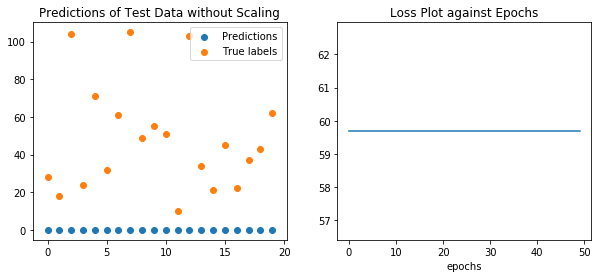

In [7]:
# Plot the results, accuracy and loss function
results = model.predict(x_test)

fig, axs = plt.subplots(1,2,figsize=(10,4))
ax = axs[0]
ax.scatter(range(20),results,label='Predictions')
ax.scatter(range(20),y_test,label='True labels')
ax.legend()
ax.set_title('Predictions of Test Data without Scaling')

ax = axs[1]
ax.plot(history.history['loss'])
ax.set_title('Loss Plot against Epochs')
ax.set_xlabel('epochs')
plt.show()

### With Scaling

In [8]:
data = np.array(DataList, dtype=float)
target = np.array(TargetList, dtype=float)

# Scale the data between 0 and 1
dataScale = data/100
targetScale = target/100

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(dataScale, targetScale, test_size=0.2, random_state=4)

In [9]:
# RNN model
model = Sequential()

# Add the LSTM
model.add(LSTM((1), batch_input_shape=(None,8,1), return_sequences=False))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Fit the training data to the model
history = model.fit(x_train, y_train, epochs=50, verbose=0, validation_data=(x_test,y_test))

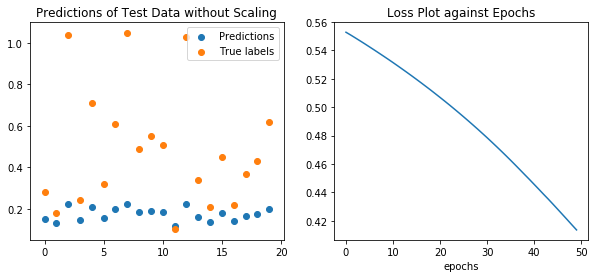

In [11]:
# Plot the results, accuracy and loss function
results = model.predict(x_test)

fig, axs = plt.subplots(1,2,figsize=(10,4))
ax = axs[0]
ax.scatter(range(20),results,label='Predictions')
ax.scatter(range(20),y_test,label='True labels')
ax.legend()
ax.set_title('Predictions of Test Data without Scaling')

ax = axs[1]
ax.plot(history.history['loss'])
ax.set_title('Loss Plot against Epochs')
ax.set_xlabel('epochs')
plt.show()

## Problem 2

The code and related plots are shown as follows. We can see that at the end the total score of the Q matrix converges. In addition, the testing step shows that the model has found the optimum policy start from any initial states.

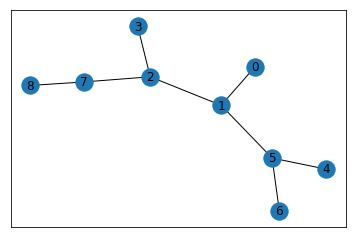

In [12]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7), (7,8)]

goal = 8

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [13]:
# how many points in graph? x points
MATRIX_SIZE = 9

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

print(R)

[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [14]:
# Build the Q matrix
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  #print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

In [16]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    #print ('Total Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.          51.0150482    0.           0.           0.
    0.           0.           0.           0.        ]
 [ 40.81203856   0.          63.76881025   0.           0.
   40.81203856   0.           0.           0.        ]
 [  0.          51.0150482    0.          51.0150482    0.
    0.           0.          79.98732869   0.        ]
 [  0.           0.          63.98986295   0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   40.81203856   0.           0.           0.        ]
 [  0.          51.0150482    0.           0.          32.64963085
    0.          32.64963085   0.           0.        ]
 [  0.           0.           0.           0.           0.
   40.81203856   0.           0.           0.        ]
 [  0.           0.          63.98986295   0.           0.
    0.           0.           0.          99.98416086]
 [  0.           0.           0.           0.           0.
   

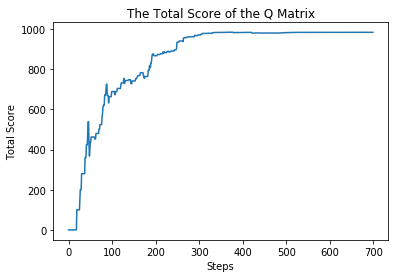

In [17]:
plt.plot(scores)
plt.title('The Total Score of the Q Matrix')
plt.xlabel('Steps')
plt.ylabel('Total Score')
plt.show()

In [18]:
# Testing
def optimum_path(current_state):
    steps = [current_state]
    
    while current_state != 8:
        next_step_index = np.where(Q[current_state,]
            == np.max(Q[current_state,]))[1]
    
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)
    
        steps.append(next_step_index)
        current_state = next_step_index
        
    return steps

for i in range(9):
    print("Most efficient path start from state %s:"%i)
    print(optimum_path(i))

Most efficient path start from state 0:
[0, 1, 2, 7, 8]
Most efficient path start from state 1:
[1, 2, 7, 8]
Most efficient path start from state 2:
[2, 7, 8]
Most efficient path start from state 3:
[3, 2, 7, 8]
Most efficient path start from state 4:
[4, 5, 1, 2, 7, 8]
Most efficient path start from state 5:
[5, 1, 2, 7, 8]
Most efficient path start from state 6:
[6, 5, 1, 2, 7, 8]
Most efficient path start from state 7:
[7, 8]
Most efficient path start from state 8:
[8]
